*Importing* Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importing The Dataset

In [ ]:
df = pd.read_csv('breast_cancer.csv')
#print(df.columns)
X = df.iloc[:, :-1].values  #independent variables
y = df.iloc[:, -1].values   #dependent variables

Splitting The Data Into Training Set And Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Building The Neural Network

In [ ]:
#importing the necessary libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#setting up the layers of the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(10,)),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
#compliling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
16/16 [==============================] - 2s 34ms/step - loss: 0.7103 - accuracy: 0.5418 - val_loss: 0.5749 - val_accuracy: 0.7455
Epoch 2/10
16/16 [==============================] - 0s 13ms/step - loss: 0.5213 - accuracy: 0.7862 - val_loss: 0.4395 - val_accuracy: 0.8545
Epoch 3/10
16/16 [==============================] - 0s 9ms/step - loss: 0.3917 - accuracy: 0.8961 - val_loss: 0.3494 - val_accuracy: 0.9636
Epoch 4/10
16/16 [==============================] - 0s 9ms/step - loss: 0.3041 - accuracy: 0.9369 - val_loss: 0.2885 - val_accuracy: 0.9818
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.2449 - accuracy: 0.9532 - val_loss: 0.2459 - val_accuracy: 0.9818
Epoch 6/10
16/16 [==============================] - 0s 9ms/step - loss: 0.2041 - accuracy: 0.9633 - val_loss: 0.2151 - val_accuracy: 0.9818
Epoch 7/10
16/16 [==============================] - 0s 9ms/step - loss: 0.1742 - accuracy: 0.9654 - val_loss: 0.1925 - val_accuracy: 0.9636
Epoch 8/10
16/16 

Accuracy Of The Model On Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.1087 - accuracy: 0.9635
0.9635036587715149


In [ ]:
#prediction probabilities
y_pred = model.predict(X_test_std)
print(y_pred[1])

5/5 [==============================] - 0s 4ms/step
[0.97132224 0.5011415 ]


In [ ]:
#converting prediction probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]


In [ ]:
#predicting values of training data to check for overfitting
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
x_pred = model.predict(X_train_std)
x_pred_labels = [np.argmax(i) for i in x_pred]
accuracy_score(y_train, x_pred_labels)

18/18 [==============================] - 0s 6ms/step


0.9688644688644689

Precision Score

In [ ]:
precision = precision_score(y_test, y_pred_labels)
print("Precision:", precision)

Precision: 0.9411764705882353


Recall Score

In [ ]:
recall = recall_score(y_test, y_pred_labels)
print("Recall:", recall)

Recall: 0.96


F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred_labels)
print("F1-score:", f1)

F1-score: 0.9504950495049505


Confusion Matrix

Confusion Matrix:
[[84  3]
 [ 2 48]]


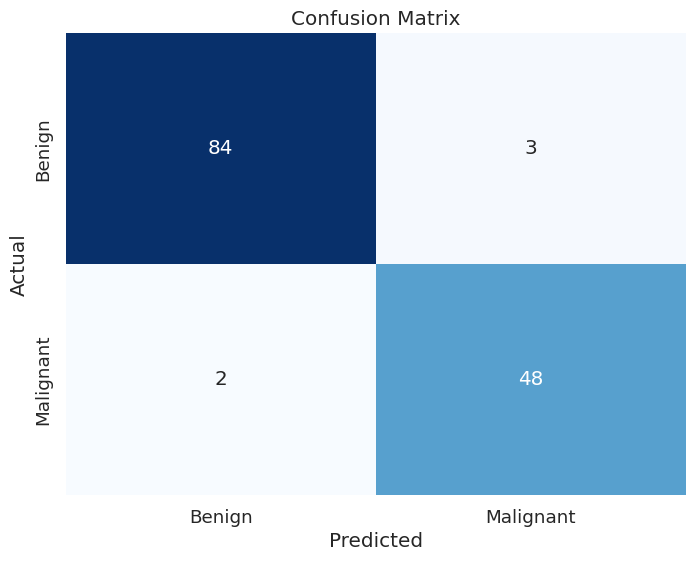

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming conf_matrix is obtained using confusion_matrix(y_test, y_pred_labels)

# Create a Seaborn heatmap for the confusion matrix
sns.set(font_scale=1.2)  # Adjust font size for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Building A Predictive System

In [ ]:
input_data = (1168736,10,10,10,10,10,1,8,88,0)

#change the input data to a numpy array
input_data_np = np.asarray(input_data)

#reshape the numpyarray as we are predicting for one data point
input_data_reshaped = input_data_np.reshape(1,-1)

#feature scaling the input data
input_data_std = sc.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print("The tumor is Benign.")

else:
  print("The tumor is Malignant.")

1/1 [==============================] - 0s 68ms/step
[[0.96946025 0.95074135]]
[0]
The tumor is Benign.
